# Time Series Analysis for Apple's stock

This is an attempt at understanding the fundamentals of time series analysis by implementing and visualizing concepts like trends, seasonality, moving avaerage, auto regression etc.

Source: https://towardsdatascience.com/trend-seasonality-moving-average-auto-regressive-model-my-journey-to-time-series-data-with-edc4c0c8284b

In [6]:
#getting the data
import urllib.request
data = "https://raw.githubusercontent.com/JaeDukSeo/sample_data/master/aapl.csv"
urllib.request.urlretrieve(data, "aapl.csv")

('aapl.csv', <http.client.HTTPMessage at 0x17bb5d87278>)

In [30]:
# Load required modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
import sys

In [31]:
# Load data in DataFrame
df = pd.read_csv("aapl.csv", delimiter=',', usecols=['Date','Open','High','Low','Close'])
df.Date = pd.to_datetime(df.Date)
df['Mean'] = (df.High + df.Low) / 2.0
df.head()

,Date,Open,High,Low,Close,Mean
0,2008-10-14,116.26,116.40,103.14,104.08,109.770
1,2008-10-13,104.55,110.53,101.02,110.26,105.775
2,2008-10-10,85.70,100.00,85.00,96.80,92.500
3,2008-10-09,93.35,95.80,86.60,88.74,91.200
4,2008-10-08,85.91,96.33,85.68,89.79,91.005


In [32]:
# using statsmodel library to plot trend, seasonality and noise.
decomposition = seasonal_decompose(df.Mean.values, freq=365)
trace1 = go.Scatter(x = df.Date, y = decomposition.trend, name='Trend', mode='lines')
trace2 = go.Scatter(x = df.Date, y = decomposition.seasonal, name='Seasonality', mode='lines')
trace3 = go.Scatter(x = df.Date, y = decomposition.resid, name='Residual', mode='lines')
trace4 = go.Scatter(x = df.Date, y = df.Mean, name='Mean Value Stock', mode='lines')

In [33]:
# a. Standard Average of Window
Mean_list = list(df.Mean)
window_size = 50
N = len(Mean_list)
std_avg_predictions = list(Mean_list[:window_size])
for pred_idx in range(window_size, N):
    std_avg_predictions.append(np.mean(Mean_list[pred_idx-window_size:pred_idx]))
    
# b. EXP Average of Window
window_size = 100
run_avg_predictions = []
running_mean = 0.0
run_avg_predictions.append(running_mean)
decay = 0.8

for pred_idx in range(1, N):
    running_mean = running_mean*decay + (1.0-decay)*Mean_list[pred_idx-1]
    run_avg_predictions.append(running_mean)

trace5 = go.Scatter(x = df.Date, y = std_avg_predictions, name='Window AVG', mode='lines')
trace6 = go.Scatter(x = df.Date, y = run_avg_predictions, name='Moving AVG', mode='lines')

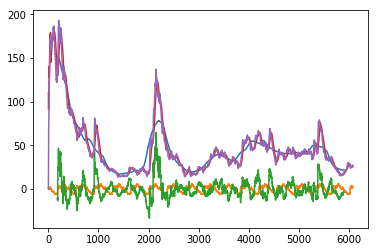

In [34]:
window_size = 50
ar_list = list(Mean_list[:window_size])
for pred_idx in range(window_size, N):
    current_window = Mean_list[pred_idx-window_size:pred_idx]
    model = AR(current_window)
    model_fit = model.fit(49)
    current_predict = model_fit.predict(49, 49)[0]
    ar_list.append(current_predict)

trace7 = go.Scatter(x = df.Date, y = ar_list, name = 'Auto Regression', mode='lines')

data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7]
plot(data)

import matplotlib.pyplot as plt

plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.plot(std_avg_predictions)
plt.plot(run_avg_predictions)
plt.show(ar_list)
